In [1]:
import requests
import zipfile
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import altair as alt


In [2]:
zip_url_1= "https://github.com/aaubs/ds-master/raw/main/data/assignments_datasets/KIVA/kiva_loans_part_0.csv.zip"
zip_url_2= "https://github.com/aaubs/ds-master/raw/main/data/assignments_datasets/KIVA/kiva_loans_part_1.csv.zip"
zip_url_3= "https://github.com/aaubs/ds-master/raw/main/data/assignments_datasets/KIVA/kiva_loans_part_2.csv.zip"

    # Download the ZIP file
response = requests.get(zip_url_1)
response.raise_for_status()  # Check if the request was successful

# Open the ZIP file from the response content
with zipfile.ZipFile(io.BytesIO(response.content)) as zf:
     # List all files in the ZIP
    print(zf.namelist())

        # Read a specific CSV file from the ZIP
    df1 = pd.read_csv(zf.open('kiva_loans_part_0.csv'))


    # Download the ZIP file
response = requests.get(zip_url_2)
response.raise_for_status()  # Check if the request was successful

    # Open the ZIP file from the response content
with zipfile.ZipFile(io.BytesIO(response.content)) as zf:
        # List all files in the ZIP
    print(zf.namelist())

        # Read a specific CSV file from the ZIP
    df2 = pd.read_csv(zf.open('kiva_loans_part_1.csv'))

    # Download the ZIP file
response = requests.get(zip_url_3)
response.raise_for_status()  # Check if the request was successful

    # Open the ZIP file from the response content
with zipfile.ZipFile(io.BytesIO(response.content)) as zf:
        # List all files in the ZIP
    print(zf.namelist())

        # Read a specific CSV file from the ZIP
    df3 = pd.read_csv(zf.open('kiva_loans_part_2.csv'))



data = pd.concat([df1, df2, df3])



['kiva_loans_part_0.csv', '__MACOSX/._kiva_loans_part_0.csv']
['kiva_loans_part_1.csv', '__MACOSX/._kiva_loans_part_1.csv']
['kiva_loans_part_2.csv', '__MACOSX/._kiva_loans_part_2.csv']


In [3]:
data.head(5)


,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


In [4]:
data.drop(['tags','posted_time','disbursed_time', 'funded_time', 'date', 'country_code' , 'use', 'region', 'currency'], axis = 'columns', inplace = True)
data.dropna(inplace = True)

valid_genders = ['male', 'female']
data = data[data['borrower_genders'].isin(valid_genders)]

We apply a label encoder to the categorical variables represented by text.

In [5]:
data.head(5)

,id,funded_amount,loan_amount,activity,sector,country,partner_id,term_in_months,lender_count,borrower_genders,repayment_interval
0,653051,300.0,300.0,Fruits & Vegetables,Food,Pakistan,247.0,12.0,12,female,irregular
2,653068,150.0,150.0,Transportation,Transportation,India,334.0,43.0,6,female,bullet
3,653063,200.0,200.0,Embroidery,Arts,Pakistan,247.0,11.0,8,female,irregular
4,653084,400.0,400.0,Milk Sales,Food,Pakistan,245.0,14.0,16,female,monthly
6,653067,200.0,200.0,Dairy,Agriculture,India,334.0,43.0,8,female,bullet


In [6]:
from sklearn.preprocessing import LabelEncoder


le_activity = LabelEncoder()
le_sector = LabelEncoder()
le_country = LabelEncoder()
le_gender = LabelEncoder()
le_repayment = LabelEncoder()



data['activity_id'] = le_activity.fit_transform(data['activity'])
data['country_id'] = le_country.fit_transform(data['country'])
data['sector_id'] = le_sector.fit_transform(data['sector'])
data['gender_id'] = le_gender.fit_transform(data['borrower_genders'])
data['repayment_id'] = le_repayment.fit_transform(data['repayment_interval'])




In [7]:
data.head(5)

,id,funded_amount,loan_amount,activity,sector,country,partner_id,term_in_months,lender_count,borrower_genders,repayment_interval,activity_id,country_id,sector_id,gender_id,repayment_id
0,653051,300.0,300.0,Fruits & Vegetables,Food,Pakistan,247.0,12.0,12,female,irregular,67,50,6,0,1
2,653068,150.0,150.0,Transportation,Transportation,India,334.0,43.0,6,female,bullet,148,26,13,0,0
3,653063,200.0,200.0,Embroidery,Arts,Pakistan,247.0,11.0,8,female,irregular,52,50,1,0,1
4,653084,400.0,400.0,Milk Sales,Food,Pakistan,245.0,14.0,16,female,monthly,95,50,6,0,2
6,653067,200.0,200.0,Dairy,Agriculture,India,334.0,43.0,8,female,bullet,44,26,0,0,0


In [8]:
data_subset = data.drop(['id','partner_id','activity','sector','country', 'borrower_genders', 'repayment_interval'], axis = 'columns')

data_subset.head()

,funded_amount,loan_amount,term_in_months,lender_count,activity_id,country_id,sector_id,gender_id,repayment_id
0,300.0,300.0,12.0,12,67,50,6,0,1
2,150.0,150.0,43.0,6,148,26,13,0,0
3,200.0,200.0,11.0,8,52,50,1,0,1
4,400.0,400.0,14.0,16,95,50,6,0,2
6,200.0,200.0,43.0,8,44,26,0,0,0


We are employing a MinMaxScaler to normalize the dataset, ensuring that all features are standardized and contribute equally to distance metrics in the subsequent clustering analysis. Following the scaling process, we utilize the elbow method to determine the optimal number of clusters. This involves evaluating the inertia across a range of cluster numbers and identifying the point at which further increases in the number of clusters yield diminishing returns in reducing the distortion score.

In [9]:
from sklearn.preprocessing import MinMaxScaler




# Standardize the data
scaler = MinMaxScaler()
data_data_scaled = scaler.fit_transform(data_subset)

# Show the first few rows of the scaled data
pd.DataFrame(data_data_scaled, columns=data_subset.columns).head()

,funded_amount,loan_amount,term_in_months,lender_count,activity_id,country_id,sector_id,gender_id,repayment_id
0,0.0030,0.002751,0.064103,0.004019,0.413580,0.632911,0.428571,0.0,0.5
1,0.0015,0.001250,0.262821,0.002009,0.913580,0.329114,0.928571,0.0,0.0
2,0.0020,0.001750,0.057692,0.002679,0.320988,0.632911,0.071429,0.0,0.5
3,0.0040,0.003751,0.076923,0.005358,0.586420,0.632911,0.428571,0.0,1.0
4,0.0020,0.001750,0.262821,0.002679,0.271605,0.329114,0.000000,0.0,0.0


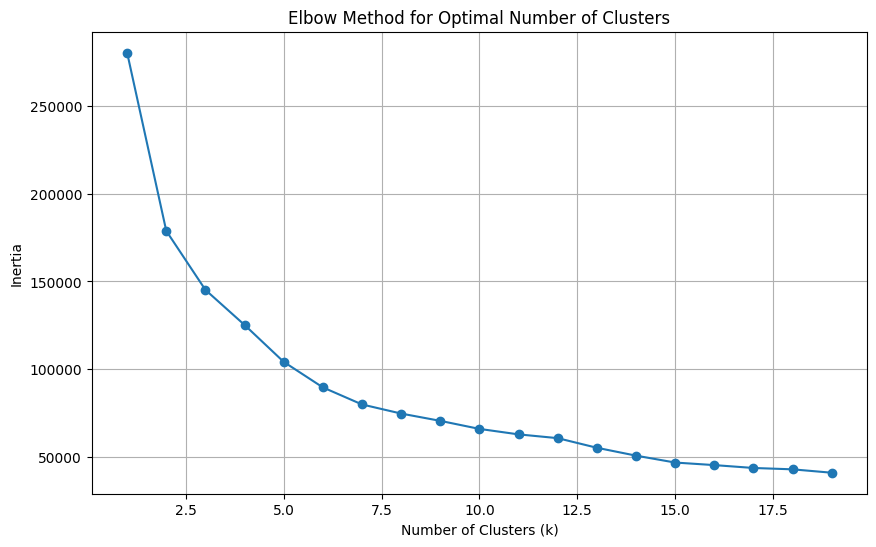

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Initialize variables
inertia_values = []
k_range = range(1, 20)  # We will check for up to 10 clusters

# Run K-means with different k values and store the inertia (sum of squared distances)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_data_scaled)
    inertia_values.append(kmeans.inertia_)

# Plot the Elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia_values, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

We choose 5 as the number of clusters.

We will begin by performing hierarchical clustering on our dataset. However, since this method is typically applied to smaller datasets, we will subset our data to include only one country before proceeding with the analysis.

In [11]:
from sklearn.metrics.pairwise import cosine_distances
data_1sector_1country = data[(data['country'] == 'Namibia')]



data_1sector_1country['cluster'] = data_1sector_1country.index
data_1sector_1country.head()
sdata_1sector_1country_iter = data_1sector_1country.copy()
cluster_iter_all = []

for i in range(10):
  # Step 1. Calcaulte the similarity matrix between all pairs of players
  sdata_1sector_1country_iter_clustering = sdata_1sector_1country_iter[~sdata_1sector_1country_iter.index.duplicated()]
  distance_matrix_inter = cosine_distances(sdata_1sector_1country_iter_clustering[['funded_amount', 'sector_id']])
  np.fill_diagonal(distance_matrix_inter, 1)
  distance_df_inter = pd.DataFrame(distance_matrix_inter, index=sdata_1sector_1country_iter_clustering.index, columns=sdata_1sector_1country_iter_clustering.index)

  # Step 2. Find and merge the nearest pairs of players
  player1_inter, player2_inter = distance_df_inter.stack().idxmin()
  sdata_1sector_1country_iter['index'] = sdata_1sector_1country_iter.index
  sdata_1sector_1country_iter.loc[sdata_1sector_1country_iter.index.isin([player1_inter, player2_inter]), 'cluster'] = sdata_1sector_1country_iter.loc[sdata_1sector_1country_iter.index.isin([player1_inter, player2_inter]), 'cluster'].values.min()
  cluster_iter_all.append(sdata_1sector_1country_iter.cluster.to_list())

  sdata_1sector_1country_iter.loc[sdata_1sector_1country_iter.index.isin([player1_inter, player2_inter]), ['funded_amount', 'sector_id']] = sdata_1sector_1country_iter.loc[sdata_1sector_1country_iter.index.isin([player1_inter, player2_inter]), ['funded_amount', 'sector_id']].mean().values
  sdata_1sector_1country_iter.loc[sdata_1sector_1country_iter.index.isin([player1_inter, player2_inter]), ['index']] = f"{player1_inter}_{player2_inter}"
  sdata_1sector_1country_iter.set_index('index', inplace=True)

  # Step 3: Keep doing this until all the players end up in one big group
  sdata_1sector_1country_iter

<ipython-input-11-f1c0e385b95c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1sector_1country['cluster'] = data_1sector_1country.index
<ipython-input-11-f1c0e385b95c>:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '202537_202823' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  sdata_1sector_1country_iter.loc[sdata_1sector_1country_iter.index.isin([player1_inter, player2_inter]), ['index']] = f"{player1_inter}_{player2_inter}"
<ipython-input-11-f1c0e385b95c>:24: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '13.625' has dtype incompat

In [12]:
cluster_iter_all

[[202537, 202537, 119929, 126177, 195953, 196218, 37207, 37653],
 [202537, 202537, 119929, 119929, 195953, 196218, 37207, 37653],
 [202537, 202537, 119929, 119929, 119929, 196218, 37207, 37653],
 [196218, 196218, 119929, 119929, 119929, 196218, 37207, 37653],
 [37653, 37653, 119929, 119929, 119929, 37653, 37207, 37653],
 [37653, 37653, 37653, 37653, 37653, 37653, 37207, 37653],
 [37207, 37207, 37207, 37207, 37207, 37207, 37207, 37207],
 [37207, 37207, 37207, 37207, 37207, 37207, 37207, 37207],
 [37207, 37207, 37207, 37207, 37207, 37207, 37207, 37207],
 [37207, 37207, 37207, 37207, 37207, 37207, 37207, 37207]]

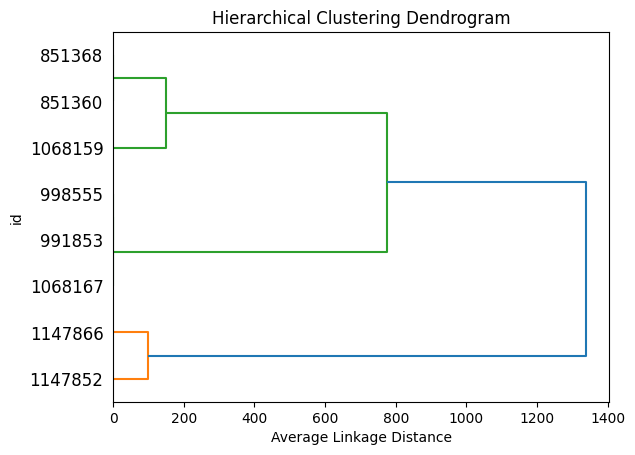

In [13]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Calculate the linkage matrix using Average Linkage
linkage_matrix = linkage(data_1sector_1country[['funded_amount', 'sector_id']], method='average')

# Create the dendrogram
dendrogram(linkage_matrix, labels=data_1sector_1country['id'].tolist(), orientation='right')

# Add labels and show the plot
plt.xlabel('Average Linkage Distance')
plt.ylabel('id')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

K-means

In [14]:
data_data_scaled

array([[3.00000000e-03, 2.75068767e-03, 6.41025641e-02, ...,
        4.28571429e-01, 0.00000000e+00, 5.00000000e-01],
       [1.50000000e-03, 1.25031258e-03, 2.62820513e-01, ...,
        9.28571429e-01, 0.00000000e+00, 0.00000000e+00],
       [2.00000000e-03, 1.75043761e-03, 5.76923077e-02, ...,
        7.14285714e-02, 0.00000000e+00, 5.00000000e-01],
       ...,
       [2.50000000e-04, 0.00000000e+00, 7.05128205e-02, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 7.05128205e-02, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 7.05128205e-02, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

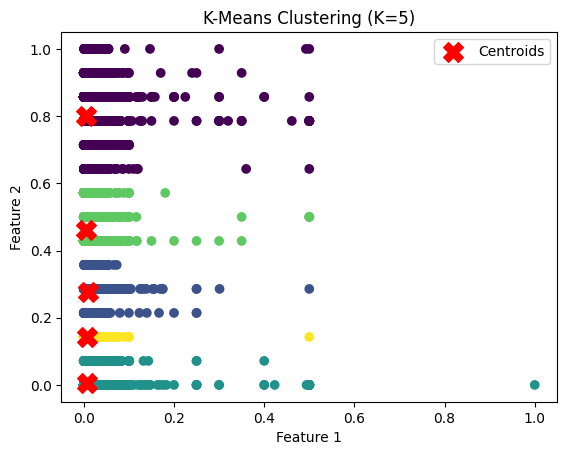

In [15]:
from sklearn.cluster import KMeans


data_data_scaled_df_X = pd.DataFrame(data_data_scaled, columns=data_subset.columns)


X = data_data_scaled_df_X[['funded_amount', 'sector_id']].values

k = 5
# Fit the K-Means model
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)

# Get cluster labels and centroids
cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'K-Means Clustering (K={k})')
plt.legend()
plt.show()

Recommender engine

In [16]:
data

,id,funded_amount,loan_amount,activity,sector,country,partner_id,term_in_months,lender_count,borrower_genders,repayment_interval,activity_id,country_id,sector_id,gender_id,repayment_id
0,653051,300.0,300.0,Fruits & Vegetables,Food,Pakistan,247.0,12.0,12,female,irregular,67,50,6,0,1
2,653068,150.0,150.0,Transportation,Transportation,India,334.0,43.0,6,female,bullet,148,26,13,0,0
3,653063,200.0,200.0,Embroidery,Arts,Pakistan,247.0,11.0,8,female,irregular,52,50,1,0,1
4,653084,400.0,400.0,Milk Sales,Food,Pakistan,245.0,14.0,16,female,monthly,95,50,6,0,2
6,653067,200.0,200.0,Dairy,Agriculture,India,334.0,43.0,8,female,bullet,44,26,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221199,1340318,0.0,25.0,Livestock,Agriculture,Paraguay,58.0,13.0,0,female,monthly,89,53,0,0,2
221200,1340323,0.0,25.0,Livestock,Agriculture,Paraguay,58.0,13.0,0,female,monthly,89,53,0,0,2
221201,1340316,25.0,25.0,Livestock,Agriculture,Kenya,138.0,13.0,1,female,monthly,89,31,0,0,2
221203,1340338,0.0,25.0,Livestock,Agriculture,Kenya,138.0,13.0,0,female,monthly,89,31,0,0,2


In [18]:
data_small = data.iloc[0:35000]
data_small.reset_index(drop=True)
data_small

,id,funded_amount,loan_amount,activity,sector,country,partner_id,term_in_months,lender_count,borrower_genders,repayment_interval,activity_id,country_id,sector_id,gender_id,repayment_id
0,653051,300.0,300.0,Fruits & Vegetables,Food,Pakistan,247.0,12.0,12,female,irregular,67,50,6,0,1
2,653068,150.0,150.0,Transportation,Transportation,India,334.0,43.0,6,female,bullet,148,26,13,0,0
3,653063,200.0,200.0,Embroidery,Arts,Pakistan,247.0,11.0,8,female,irregular,52,50,1,0,1
4,653084,400.0,400.0,Milk Sales,Food,Pakistan,245.0,14.0,16,female,monthly,95,50,6,0,2
6,653067,200.0,200.0,Dairy,Agriculture,India,334.0,43.0,8,female,bullet,44,26,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41544,694659,500.0,500.0,Grocery Store,Food,Zimbabwe,305.0,8.0,14,female,irregular,74,79,6,0,1
41545,694478,425.0,425.0,General Store,Retail,Pakistan,245.0,14.0,17,female,monthly,72,50,11,0,2
41547,694167,325.0,325.0,Tailoring,Services,Pakistan,247.0,11.0,11,female,irregular,142,50,12,0,1
41548,694444,2500.0,2500.0,Farming,Agriculture,Armenia,169.0,26.0,61,female,monthly,57,2,0,0,2


In [21]:


#Step 1: Label Encoding and Matrix Creation
# # A. Label Encoding
# import numpy as np
# from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder
le_sector = LabelEncoder()
le_userid = LabelEncoder()
data['sector_id'] = le_sector.fit_transform(data['sector'])
data['user_id'] = le_userid.fit_transform(data['id'])

data_small = data.iloc[0:35000]
data_small.reset_index(drop=True)


# B. Matrix Creation
matrix_user_loan = data_small.groupby(['user_id','sector_id'])['funded_amount'].agg('mean').unstack().fillna(0)

#Step 2: Perform Dimensionality Reduction
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=5, n_iter=7, random_state=42)
matrix_user_loan_dr = svd.fit_transform(matrix_user_loan)

#Step 3: Calculate the Similarity Matrix
from sklearn.metrics.pairwise import cosine_distances
cosine_distances_matrix_user_loan_dr = cosine_distances(matrix_user_loan_dr)

<ipython-input-21-a4691c913e29>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_small['user_id'] = le_userid.fit_transform(data_small['id'])


We selected the user with ID 653067 and employed the cosine similarity matrix to identify the individuals most similar to them.




In [22]:
le_userid.transform(['653067'])

array([16])

In [23]:
le_userid.inverse_transform([16])

array([653067])

In [24]:
data_small.loc[data_small['id'] == 653067]

,id,funded_amount,loan_amount,activity,sector,country,partner_id,term_in_months,lender_count,borrower_genders,repayment_interval,activity_id,country_id,sector_id,gender_id,repayment_id,user_id
6,653067,200.0,200.0,Dairy,Agriculture,India,334.0,43.0,8,female,bullet,44,26,0,0,0,16


In [25]:
np.argsort(cosine_distances_matrix_user_loan_dr[16,:])[:5]

array([17499, 27194, 27193, 27192, 27189])

In [26]:
le_userid.inverse_transform([17499])

array([673478])

In [27]:
data_small.loc[data_small['id'] == 673478]

,id,funded_amount,loan_amount,activity,sector,country,partner_id,term_in_months,lender_count,borrower_genders,repayment_interval,activity_id,country_id,sector_id,gender_id,repayment_id,user_id
20399,673478,125.0,125.0,Farming,Agriculture,Philippines,136.0,8.0,4,male,irregular,57,55,0,1,1,17499
